In [1]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [3]:
q1_sql = """
        select * from gp8.student
        """

In [4]:
df=pandas.read_sql_query(q1_sql,conn)
df[:]

,student_email,student_name,student_major
0,rdoe@jmu.edu,Robert Dodson,IA
1,tferrell@jmu.edu,Thomas Ferrell,IA
2,bjohnson@jmu.edu,Bob Johnson,IA
3,jdoe@jmu.edu,John Doe,IA
4,s6@jmu.edu,s5,ia


In [8]:
q2_sql = """
        select gp8.professor.p_name,
        demo.course.c_name
        from gp8.professor
        inner join demo.course
        on gp8.professor.p_email = gp8.course.p_email
        """

In [6]:
df=pandas.read_sql_query(q2_sql,conn)
df[:]

DatabaseError: Execution failed on sql '
        select gp8.professor.p_name,
        demo.course.c_name
        from demo.professor
        inner join demo.course
        on demo.professor.p_email = demo.course.p_email
        ': permission denied for schema demo
LINE 4:         from demo.professor
                     ^


In [9]:
q2_sql = """
        select gp8.professor.p_name,
        gp8.course.c_name
        from gp8.professor
        inner join gp8.course
        on gp8.professor.p_email = gp8.course.p_email
        """

In [10]:
df=pandas.read_sql_query(q2_sql,conn)
df[:]

DatabaseError: Execution failed on sql '
        select gp8.professor.p_name,
        demo.course.c_name
        from gp8.professor
        inner join demo.course
        on gp8.professor.p_email = gp8.course.p_email
        ': permission denied for schema demo
LINE 5:         inner join demo.course
                           ^


In [11]:
q2_sql = """
        select gp8.professor.p_name,
        gp8.course.c_name
        from gp8.professor
        inner join gp8.course
        on gp8.professor.p_email = gp8.course.p_email
        """

In [12]:
df=pandas.read_sql_query(q2_sql,conn)
df[:]

,p_name,c_name
0,Stephen Marrin,Issues in IA \n
1,Noel Hendrickson \n,counterfactual
2,Timothy Walton,hypothesis
3,Kathleen Moore,cyber


In [13]:
q3_sql = """
        select course_number,
        count(course_number) as num_enrolled
        from gp8.enroll_list
        group by course_number
        """

In [14]:
df=pandas.read_sql_query(q3_sql,conn)
df[:]

,course_number,num_enrolled
0,IA_312,3
1,IA_365,3
2,IA_261,1
3,IA_300,3


<AxesSubplot:xlabel='course_number'>

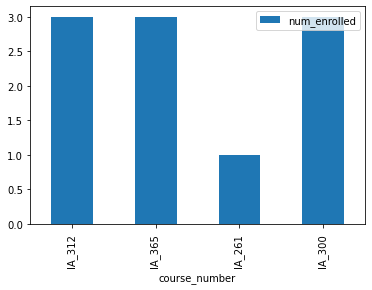

In [15]:
df.plot.bar(x='course_number',y='num_enrolled')

In [16]:
q4_sql = """
        select gp8.professor.p_name,
        count(gp8.course.c_name) as num_course
        from gp8.professor
        inner join gp8.course
        on gp8.professor.p_email = gp8.course.p_email
        group by gp8.professor.p_name
        """

In [17]:
df=pandas.read_sql_query(q4_sql,conn)
df[:]

,p_name,num_course
0,Kathleen Moore,1
1,Timothy Walton,1
2,Noel Hendrickson \n,1
3,Stephen Marrin,1


<AxesSubplot:xlabel='p_name'>

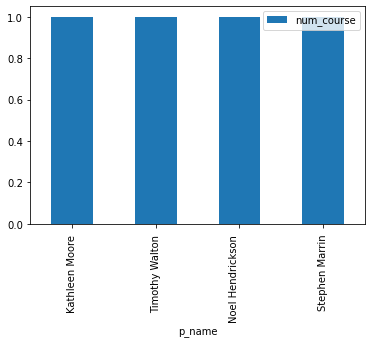

In [18]:
df.plot.bar(x='p_name',y='num_course')

In [19]:
q5_insert_professor_sql = """
            insert into gp8.professor(p_email,p_name,p_office)
            values('{}','{}','{}')
            """.format('new_lab4_email','new_p_lab4_name','new_lab4_o')
print(q5_insert_professor_sql)


            insert into gp8.professor(p_email,p_name,p_office)
            values('new_lab4_email','new_p_lab4_name','new_lab4_o')
            


In [20]:
cur.execute(q5_insert_professor_sql)

NameError: name 'cur' is not defined

In [21]:
cur=conn.cursor()

In [22]:
q5_insert_professor_sql = """
            insert into gp8.professor(p_email,p_name,p_office)
            values('{}','{}','{}')
            """.format('new_lab4_email','new_p_lab4_name','new_lab4_o')
print(q5_insert_professor_sql)


            insert into gp8.professor(p_email,p_name,p_office)
            values('new_lab4_email','new_p_lab4_name','new_lab4_o')
            


In [23]:
cur.execute(q5_insert_professor_sql)

In [24]:
conn.commit() # no error. commit

In [25]:
df=pandas.read_sql_query('select * from gp8.professor',conn)
df[:]

,p_email,p_name,p_office
0,dr_marrin@jmu.edu,Stephen Marrin,ISAT 1\n
1,n_hendrick@jmu.edu \n,Noel Hendrickson \n,ISAT 2 \n
2,dr_walton@jmu.edu,Timothy Walton,ISAT 3
3,dr_moore@jmu.edu,Kathleen Moore,ISAT 4
4,p_new_email,p_new_name,p_new_o
5,(),new_p@jmu.edu,new_p
6,new_p@jmu.edu,new_p,new_office
7,new_lab4_email,new_p_lab4_name,new_lab4_o


In [26]:
q5_insert_course_sql = """
            insert into gp8.course(course_number,c_name,room_number,p_email)
            values('{}','{}','{}','{}')
            """.format('new_lab4_c','new_lab4_n','new_lab4_r','new_lab4_email')
print(q5_insert_course_sql)


            insert into gp8.course(course_number,c_name,room_number,p_email)
            values('new_lab4_c','new_lab4_n','new_lab4_r','new_lab4_email')
            


In [27]:
cur.execute(q5_insert_course_sql)

In [28]:
conn.commit() # no error. commit

In [36]:
df=pandas.read_sql_query('select * from gp8.course',conn)
df[:]

,course_number,c_name,room_number,p_email
0,IA_300,Issues in IA \n,ENGEO_1,dr_marrin@jmu.edu
1,IA_312,counterfactual,ENGEO_2,n_hendrick@jmu.edu \n
2,IA_261,hypothesis,ISAT 5,dr_walton@jmu.edu
3,IA_365,cyber,ISAT 12,dr_moore@jmu.edu
4,new_lab4_c,new_lab4_n,new_lab4_r,new_lab4_email


In [30]:
q6_update_course_sql ="""
                    update gp8.course
                    set p_email = '{}'
                    where p_email ='{}'
                    """.format('new_lab4_email','t2@jmu.edu')

In [31]:
cur.execute(q6_update_course_sql)

In [32]:
conn.commit() # no error. commit

In [33]:
df=pandas.read_sql_query('select * from gp8.course',conn)
df[:]

,course_number,c_name,room_number,p_email
0,IA_300,Issues in IA \n,ENGEO_1,dr_marrin@jmu.edu
1,IA_312,counterfactual,ENGEO_2,n_hendrick@jmu.edu \n
2,IA_261,hypothesis,ISAT 5,dr_walton@jmu.edu
3,IA_365,cyber,ISAT 12,dr_moore@jmu.edu
4,new_lab4_c,new_lab4_n,new_lab4_r,new_lab4_email


In [34]:
q6_delete_professor_sql = """
                            delete from gp8.professor
                            where p_email='{}'
                            """.format('t2@jmu.edu')

In [35]:
cur.execute(q6_delete_professor_sql)

In [37]:

conn.commit() # no error. commit

In [38]:
df=pandas.read_sql_query('select * from gp8.professor',conn)
df[:]

,p_email,p_name,p_office
0,dr_marrin@jmu.edu,Stephen Marrin,ISAT 1\n
1,n_hendrick@jmu.edu \n,Noel Hendrickson \n,ISAT 2 \n
2,dr_walton@jmu.edu,Timothy Walton,ISAT 3
3,dr_moore@jmu.edu,Kathleen Moore,ISAT 4
4,p_new_email,p_new_name,p_new_o
5,(),new_p@jmu.edu,new_p
6,new_p@jmu.edu,new_p,new_office
7,new_lab4_email,new_p_lab4_name,new_lab4_o


In [39]:
cur.close()

In [40]:
conn.close()